In [70]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
from  google.colab import drive
drive.mount('/gdrive', force_remount=True)
%cd /gdrive/MyDrive

Mounted at /gdrive
/gdrive/MyDrive


In [72]:
bb = pd.read_excel('boschi_bruciati.xlsx')

In [73]:
bb.head()

,anni,numero incendi,Totale km
0,1970,6579,68170
1,1971,5617,82339
2,1972,2358,19314
3,1973,5681,84438
4,1974,5055,66035


In [74]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   anni            46 non-null     int64
 1   numero incendi  46 non-null     int64
 2   Totale km       46 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [75]:
bb.isnull().sum()

anni              0
numero incendi    0
Totale km         0
dtype: int64

In [76]:
mm = pd.read_csv('mm_precepitazioni.csv')

In [77]:
mm.head()

,comuni mm,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Torino,"697,2","628,8","1.192,8","826,2","1.317,6","1.162,4","871,4","1.035,4","1.150,2","894,2","975,4","485,8","1.080,8","1.203,4","842,8","860,8","301,0"
1,Vercelli,"650,4","602,0","1.090,8","862,8","1.186,0","758,8","753,8","934,2","1.376,6","700,2","854,6","375,8","854,4","855,0","781,8","585,7","409,2"
2,Novara,"664,0","400,6","1.256,8","1.138,4","1.357,2","864,4","858,6","840,0","1.455,2","786,4","938,2","444,8","916,4","738,4","822,6","665,6","508,8"
3,Cuneo,"733,2","671,4","1.203,2","1.218,0","1.238,6","1.032,2","880,6","987,8","1.211,6","846,0","1.013,4","576,6","1.346,2","1.161,4","863,8","672,5","675,8"
4,Asti,"517,8","485,4","1.026,6","787,2","860,6","672,0","706,0","749,2","1.090,6","642,4","674,8","367,4","820,0","836,8","602,8","360,2","380,6"


 per poter usare i dati devo togliere i punti che indicano le migliaglia

In [78]:
mm["2006"] = mm["2006"].str.replace(".","")
mm["2007"] = mm["2007"].str.replace(".","")
mm["2008"] = mm["2008"].str.replace(".","")
mm["2009"] = mm["2009"].str.replace(".","")
mm["2010"] = mm["2010"].str.replace(".","")
mm["2011"] = mm["2011"].str.replace(".","")
mm["2012"] = mm["2012"].str.replace(".","")
mm["2013"] = mm["2013"].str.replace(".","")
mm["2014"] = mm["2014"].str.replace(".","")
mm["2015"] = mm["2015"].str.replace(".","")
mm["2016"] = mm["2016"].str.replace(".","")
mm["2017"] = mm["2017"].str.replace(".","")
mm["2018"] = mm["2018"].str.replace(".","")
mm["2019"] = mm["2019"].str.replace(".","")
mm["2020"] = mm["2020"].str.replace(".","")
mm["2021"] = mm["2021"].str.replace(".","")
mm["2022"] = mm["2022"].str.replace(".","")

In [79]:
mm.head()

,comuni mm,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Torino,"697,2","628,8","1192,8","826,2","1317,6","1162,4","871,4","1035,4","1150,2","894,2","975,4","485,8","1080,8","1203,4","842,8","860,8","301,0"
1,Vercelli,"650,4","602,0","1090,8","862,8","1186,0","758,8","753,8","934,2","1376,6","700,2","854,6","375,8","854,4","855,0","781,8","585,7","409,2"
2,Novara,"664,0","400,6","1256,8","1138,4","1357,2","864,4","858,6","840,0","1455,2","786,4","938,2","444,8","916,4","738,4","822,6","665,6","508,8"
3,Cuneo,"733,2","671,4","1203,2","1218,0","1238,6","1032,2","880,6","987,8","1211,6","846,0","1013,4","576,6","1346,2","1161,4","863,8","672,5","675,8"
4,Asti,"517,8","485,4","1026,6","787,2","860,6","672,0","706,0","749,2","1090,6","642,4","674,8","367,4","820,0","836,8","602,8","360,2","380,6"


In [80]:
mm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   comuni mm  109 non-null    object
 1   2006       109 non-null    object
 2   2007       109 non-null    object
 3   2008       109 non-null    object
 4   2009       109 non-null    object
 5   2010       109 non-null    object
 6   2011       109 non-null    object
 7   2012       109 non-null    object
 8   2013       109 non-null    object
 9   2014       109 non-null    object
 10  2015       109 non-null    object
 11  2016       109 non-null    object
 12  2017       109 non-null    object
 13  2018       109 non-null    object
 14  2019       109 non-null    object
 15  2020       109 non-null    object
 16  2021       109 non-null    object
 17  2022       109 non-null    object
dtypes: object(18)
memory usage: 15.5+ KB


In [81]:
mm.isnull().sum()

comuni mm    0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
2014         0
2015         0
2016         0
2017         0
2018         0
2019         0
2020         0
2021         0
2022         0
dtype: int64

In [82]:
mm["2006"] = mm["2006"].str.replace(",",".")
mm["2007"] = mm["2007"].str.replace(",",".")
mm["2008"] = mm["2008"].str.replace(",",".")
mm["2009"] = mm["2009"].str.replace(",",".")
mm["2010"] = mm["2010"].str.replace(",",".")
mm["2011"] = mm["2011"].str.replace(",",".")
mm["2012"] = mm["2012"].str.replace(",",".")
mm["2013"] = mm["2013"].str.replace(",",".")
mm["2014"] = mm["2014"].str.replace(",",".")
mm["2015"] = mm["2015"].str.replace(",",".")
mm["2016"] = mm["2016"].str.replace(",",".")
mm["2017"] = mm["2017"].str.replace(",",".")
mm["2018"] = mm["2018"].str.replace(",",".")
mm["2019"] = mm["2019"].str.replace(",",".")
mm["2020"] = mm["2020"].str.replace(",",".")
mm["2021"] = mm["2021"].str.replace(",",".")
mm["2022"] = mm["2022"].str.replace(",",".")

In [83]:
mm.shape

(109, 18)

In [84]:
mm.head()

,comuni mm,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Torino,697.2,628.8,1192.8,826.2,1317.6,1162.4,871.4,1035.4,1150.2,894.2,975.4,485.8,1080.8,1203.4,842.8,860.8,301.0
1,Vercelli,650.4,602.0,1090.8,862.8,1186.0,758.8,753.8,934.2,1376.6,700.2,854.6,375.8,854.4,855.0,781.8,585.7,409.2
2,Novara,664.0,400.6,1256.8,1138.4,1357.2,864.4,858.6,840.0,1455.2,786.4,938.2,444.8,916.4,738.4,822.6,665.6,508.8
3,Cuneo,733.2,671.4,1203.2,1218.0,1238.6,1032.2,880.6,987.8,1211.6,846.0,1013.4,576.6,1346.2,1161.4,863.8,672.5,675.8
4,Asti,517.8,485.4,1026.6,787.2,860.6,672.0,706.0,749.2,1090.6,642.4,674.8,367.4,820.0,836.8,602.8,360.2,380.6


elimino gli spazi vuoti che potrebbero crearmi problemi nei futuri calcoli, anche a discapito di avere meno dati

In [85]:
mm.replace(" ", pd.NA, inplace=True)
mm = mm.dropna()

 cambio i dati in int da oggetti

In [86]:
mm["2006"] = pd.to_numeric(mm["2006"])
mm["2007"] = pd.to_numeric(mm["2007"])
mm["2008"] = pd.to_numeric(mm["2008"])
mm["2009"] = pd.to_numeric(mm["2009"])
mm["2010"] = pd.to_numeric(mm["2010"])
mm["2011"] = pd.to_numeric(mm["2011"])
mm["2012"] = pd.to_numeric(mm["2012"])
mm["2013"] = pd.to_numeric(mm["2013"])
mm["2014"] = pd.to_numeric(mm["2014"])
mm["2015"] = pd.to_numeric(mm["2015"])
mm["2016"] = pd.to_numeric(mm["2016"])
mm["2017"] = pd.to_numeric(mm["2017"])
mm["2018"] = pd.to_numeric(mm["2018"])
mm["2019"] = pd.to_numeric(mm["2019"])
mm["2020"] = pd.to_numeric(mm["2020"])
mm["2021"] = pd.to_numeric(mm["2021"])
mm["2022"] = pd.to_numeric(mm["2022"])

<ipython-input-86-e35eaf7ff8d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mm["2006"] = pd.to_numeric(mm["2006"])
<ipython-input-86-e35eaf7ff8d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mm["2007"] = pd.to_numeric(mm["2007"])
<ipython-input-86-e35eaf7ff8d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [87]:
mm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 0 to 108
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   comuni mm  78 non-null     object 
 1   2006       78 non-null     float64
 2   2007       78 non-null     float64
 3   2008       78 non-null     float64
 4   2009       78 non-null     float64
 5   2010       78 non-null     float64
 6   2011       78 non-null     float64
 7   2012       78 non-null     float64
 8   2013       78 non-null     float64
 9   2014       78 non-null     float64
 10  2015       78 non-null     float64
 11  2016       78 non-null     float64
 12  2017       78 non-null     float64
 13  2018       78 non-null     float64
 14  2019       78 non-null     float64
 15  2020       78 non-null     float64
 16  2021       78 non-null     float64
 17  2022       78 non-null     float64
dtypes: float64(17), object(1)
memory usage: 11.6+ KB


In [88]:
gradi = pd.read_csv('comuni_gradi.csv')

In [89]:
gradi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Comuni gradi  109 non-null    object
 1   2006          109 non-null    object
 2   2007          109 non-null    object
 3   2008          109 non-null    object
 4   2009          109 non-null    object
 5   2010          109 non-null    object
 6   2011          109 non-null    object
 7   2012          109 non-null    object
 8   2013          109 non-null    object
 9   2014          109 non-null    object
 10  2015          109 non-null    object
 11  2016          109 non-null    object
 12  2017          109 non-null    object
 13  2018          109 non-null    object
 14  2019          109 non-null    object
 15  2020          109 non-null    object
 16  2021          109 non-null    object
 17  2022          109 non-null    object
dtypes: object(18)
memory usage: 15.5+ KB


In [90]:
gradi.isnull().sum()

Comuni gradi    0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0
dtype: int64

faccio gli stessi procedimenti con questo dataframe

In [91]:
gradi["2006"] = gradi["2006"].str.replace(",",".")
gradi["2007"] = gradi["2007"].str.replace(",",".")
gradi["2008"] = gradi["2008"].str.replace(",",".")
gradi["2009"] = gradi["2009"].str.replace(",",".")
gradi["2010"] = gradi["2010"].str.replace(",",".")
gradi["2011"] = gradi["2011"].str.replace(",",".")
gradi["2012"] = gradi["2012"].str.replace(",",".")
gradi["2013"] = gradi["2013"].str.replace(",",".")
gradi["2014"] = gradi["2014"].str.replace(",",".")
gradi["2015"] = gradi["2015"].str.replace(",",".")
gradi["2016"] = gradi["2016"].str.replace(",",".")
gradi["2017"] = gradi["2017"].str.replace(",",".")
gradi["2018"] = gradi["2018"].str.replace(",",".")
gradi["2019"] = gradi["2019"].str.replace(",",".")
gradi["2020"] = gradi["2020"].str.replace(",",".")
gradi["2021"] = gradi["2021"].str.replace(",",".")
gradi["2022"] = gradi["2022"].str.replace(",",".")

In [92]:
gradi.replace("....", pd.NA, inplace=True)
gradi = gradi.dropna()

In [93]:
gradi["2006"] = gradi["2006"].apply(pd.to_numeric)
gradi["2007"] = gradi["2007"].apply(pd.to_numeric)
gradi["2008"] = gradi["2008"].apply(pd.to_numeric)
gradi["2009"] = gradi["2009"].apply(pd.to_numeric)
gradi["2010"] = gradi["2010"].apply(pd.to_numeric)
gradi["2011"] = gradi["2011"].apply(pd.to_numeric)
gradi["2012"] = gradi["2012"].apply(pd.to_numeric)
gradi["2013"] = gradi["2013"].apply(pd.to_numeric)
gradi["2014"] = gradi["2014"].apply(pd.to_numeric)
gradi["2015"] = gradi["2015"].apply(pd.to_numeric)
gradi["2016"] = gradi["2016"].apply(pd.to_numeric)
gradi["2017"] = gradi["2017"].apply(pd.to_numeric)
gradi["2018"] = gradi["2018"].apply(pd.to_numeric)
gradi["2019"] = gradi["2019"].apply(pd.to_numeric)
gradi["2020"] = gradi["2020"].apply(pd.to_numeric)
gradi["2021"] = gradi["2021"].apply(pd.to_numeric)
gradi["2022"] = gradi["2022"].apply(pd.to_numeric)

<ipython-input-93-5c28e8721117>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gradi["2006"] = gradi["2006"].apply(pd.to_numeric)
<ipython-input-93-5c28e8721117>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gradi["2007"] = gradi["2007"].apply(pd.to_numeric)
<ipython-input-93-5c28e8721117>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [94]:
gradi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 0 to 101
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Comuni gradi  84 non-null     object 
 1   2006          84 non-null     float64
 2   2007          84 non-null     float64
 3   2008          84 non-null     float64
 4   2009          84 non-null     float64
 5   2010          84 non-null     float64
 6   2011          84 non-null     float64
 7   2012          84 non-null     float64
 8   2013          84 non-null     float64
 9   2014          84 non-null     float64
 10  2015          84 non-null     float64
 11  2016          84 non-null     float64
 12  2017          84 non-null     float64
 13  2018          84 non-null     float64
 14  2019          84 non-null     float64
 15  2020          84 non-null     float64
 16  2021          84 non-null     float64
 17  2022          84 non-null     float64
dtypes: float64(17), object(1)
memory usa

In [95]:
gradi.shape

(84, 18)

In [96]:
mm.shape

(78, 18)

In [97]:
bb.shape

(46, 3)

togliendo le righe dai database (mm) e (gradi) abbiamo notato che mm è calato da 30 righe, comunque non servirebbe unire questi due database

In [98]:
latina_mm= mm.loc[mm['comuni mm'] == "Latina"]
latina_g = gradi.loc[gradi['Comuni gradi'] == "Latina"]

In [99]:
import seaborn as sns

cambio i dataframe per rederli utili per creare dei grafici

In [100]:
# Utilizza il metodo melt per trasformare gli anni in righe
latina_g = latina_g.melt(id_vars=["Comuni gradi"], var_name="Anno", value_name="Gradi")

In [101]:
latina_mm = latina_mm.melt(id_vars=["comuni mm"], var_name="Anno", value_name="avarega_mm")

In [102]:
latina_g = latina_g.rename(columns={"Comuni gradi": "comuni mm"})
latina_merged = pd.merge(latina_mm, latina_g, on=["comuni mm", "Anno"])
latina_merged = latina_merged.rename(columns={"comuni mm" : "comune" , "Anno" : "anno", "gradi" : "average_degree"})

In [103]:
roma_mm= mm.loc[mm['comuni mm'] == "Roma"]
roma_g= gradi.loc[gradi['Comuni gradi'] == "Roma"]
roma_g = roma_g.melt(id_vars=["Comuni gradi"], var_name="Anno", value_name="Gradi")
roma_mm = roma_mm.melt(id_vars=["comuni mm"], var_name="Anno", value_name="avarega_mm")
roma_g = roma_g.rename(columns={"Comuni gradi": "comuni mm"})
roma_merged = pd.merge(roma_mm, roma_g, on=["comuni mm", "Anno"])
roma_merged = roma_merged.rename(columns={"comuni mm" : "comune" , "Anno" : "anno", "gradi" : "average_degree"})
roma_merged.head()

,comune,anno,avarega_mm,Gradi
0,Roma,2006,545.8,16.3
1,Roma,2007,430.0,16.4
2,Roma,2008,1011.1,16.3
3,Roma,2009,742.8,16.8
4,Roma,2010,958.9,16.6


In [104]:
rieti_mm= mm.loc[mm['comuni mm'] == "Rieti"]
rieti_g= gradi.loc[gradi['Comuni gradi'] == "Rieti"]
rieti_g = rieti_g.melt(id_vars=["Comuni gradi"], var_name="Anno", value_name="Gradi")
rieti_mm = rieti_mm.melt(id_vars=["comuni mm"], var_name="Anno", value_name="avarega_mm")
rieti_g = rieti_g.rename(columns={"Comuni gradi": "comuni mm"})
rieti_merged = pd.merge(rieti_mm, rieti_g, on=["comuni mm", "Anno"])
rieti_merged = rieti_merged.rename(columns={"comuni mm" : "comune" , "Anno" : "anno", "gradi" : "average_degree"})
rieti_merged.head()

,comune,anno,avarega_mm,Gradi
0,Rieti,2006,610.1,13.5
1,Rieti,2007,590.4,13.8
2,Rieti,2008,1391.6,13.3
3,Rieti,2009,1064.0,13.5
4,Rieti,2010,1257.6,13.2


In [105]:
viterbo_mm= mm.loc[mm['comuni mm'] == "Viterbo"]
viterbo_g= gradi.loc[gradi['Comuni gradi'] == "Viterbo"]
viterbo_g = viterbo_g.melt(id_vars=["Comuni gradi"], var_name="Anno", value_name="Gradi")
viterbo_mm = viterbo_mm.melt(id_vars=["comuni mm"], var_name="Anno", value_name="avarega_mm")
viterbo_g = viterbo_g.rename(columns={"Comuni gradi": "comuni mm"})
viterbo_merged = pd.merge(viterbo_mm, viterbo_g, on=["comuni mm", "Anno"])
viterbo_merged = viterbo_merged.rename(columns={"comuni mm" : "comune" , "Anno" : "anno", "gradi" : "average_degree"})
viterbo_merged.head()

,comune,anno,avarega_mm,Gradi
0,Viterbo,2006,661.4,16.2
1,Viterbo,2007,420.0,16.5
2,Viterbo,2008,1074.0,15.7
3,Viterbo,2009,786.2,15.9
4,Viterbo,2010,1104.2,15.4


In [106]:
roma_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   comune      17 non-null     object 
 1   anno        17 non-null     object 
 2   avarega_mm  17 non-null     float64
 3   Gradi       17 non-null     float64
dtypes: float64(2), object(2)
memory usage: 672.0+ bytes


noto che alcune colonne sono str e non int quindi devo ricovertirle

In [107]:
viterbo_merged["anno"] = pd.to_numeric(viterbo_merged["anno"])
roma_merged["anno"] = pd.to_numeric(roma_merged["anno"])
rieti_merged["anno"] = pd.to_numeric(rieti_merged["anno"])
latina_merged["anno"] = pd.to_numeric(latina_merged["anno"])

In [108]:
viterbo_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   comune      17 non-null     object 
 1   anno        17 non-null     int64  
 2   avarega_mm  17 non-null     float64
 3   Gradi       17 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 672.0+ bytes


sto creando una tabella che riusnica la media dei mm di tuttte le province disponbili

In [109]:
viterbo = viterbo_merged.drop(["comune","Gradi"],axis=1)
viterbo = viterbo.rename(columns={"avarega_mm" : "viterbo_avg_mm" })
rieti = rieti_merged.drop(["comune","Gradi"],axis=1)
rieti = rieti.rename(columns={"avarega_mm" : "rieti_avg_mm" })
roma = roma_merged.drop(["comune","Gradi"],axis=1)
roma = roma.rename(columns={"avarega_mm" : "roma_avg_mm" })
latina = latina_merged.drop(["comune","Gradi"],axis=1)
latina = latina.rename(columns={"avarega_mm" : "latina_avg_mm" })

In [110]:
tab_mm = pd.merge(viterbo, rieti, on=["anno"])
tab_mm = pd.merge(tab_mm, roma, on=["anno"])
tab_mm = pd.merge(tab_mm, latina, on=["anno"])

In [111]:
tab_mm1 = tab_mm.set_index('anno')

Text(0, 0.5, 'mm')

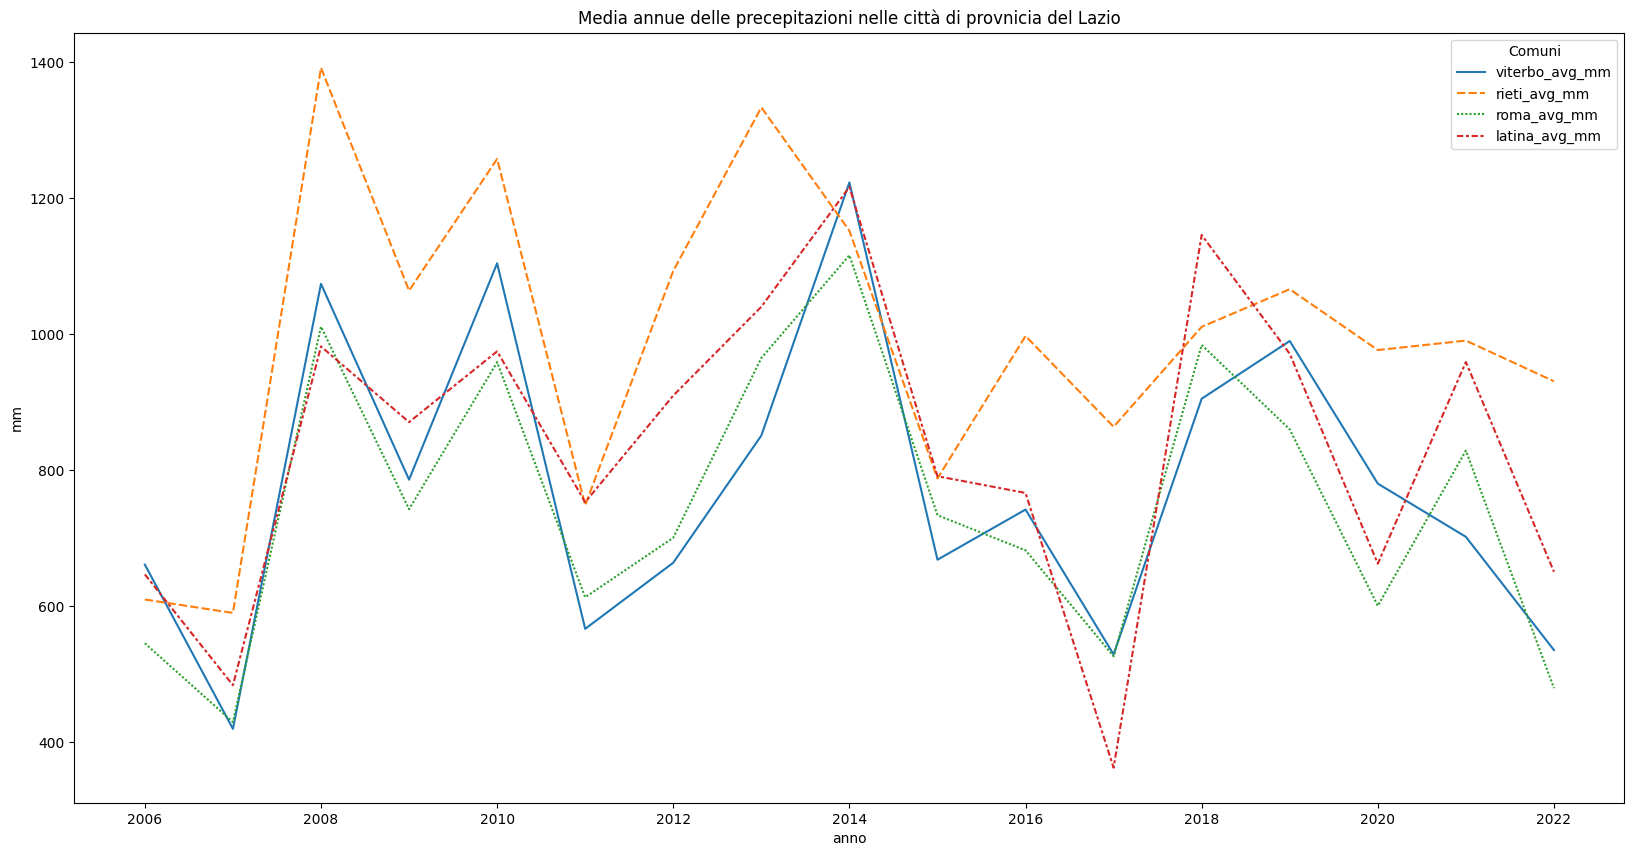

In [112]:
plt.figure(figsize=(20,10))
sns.lineplot(data=tab_mm1)
plt.title("Media annue delle precepitazioni nelle città di provnicia del Lazio")
plt.legend(title='Comuni')
plt.ylabel("mm")

In [113]:
viterbo1 = viterbo_merged.drop(["comune","avarega_mm"],axis=1)
viterbo1 = viterbo1.rename(columns={"Gradi" : "viterbo_avg_degree" })
rieti1 = rieti_merged.drop(["comune","avarega_mm"],axis=1)
rieti1 = rieti1.rename(columns={"Gradi" : "rieti_avg_degree" })
roma1 = roma_merged.drop(["comune","avarega_mm"],axis=1)
roma1 = roma1.rename(columns={"Gradi" : "roma_avg_degree" })
latina1 = latina_merged.drop(["comune","avarega_mm"],axis=1)
latina1 = latina1.rename(columns={"Gradi" : "latina_avg_degree" })

In [114]:
tab_degree = pd.merge(viterbo1, rieti1, on=["anno"])
tab_degree = pd.merge(tab_degree, roma1, on=["anno"])
tab_degree = pd.merge(tab_degree, latina1, on=["anno"])

tab_degree1 = tab_degree.set_index('anno')

Text(0, 0.5, 'degree')

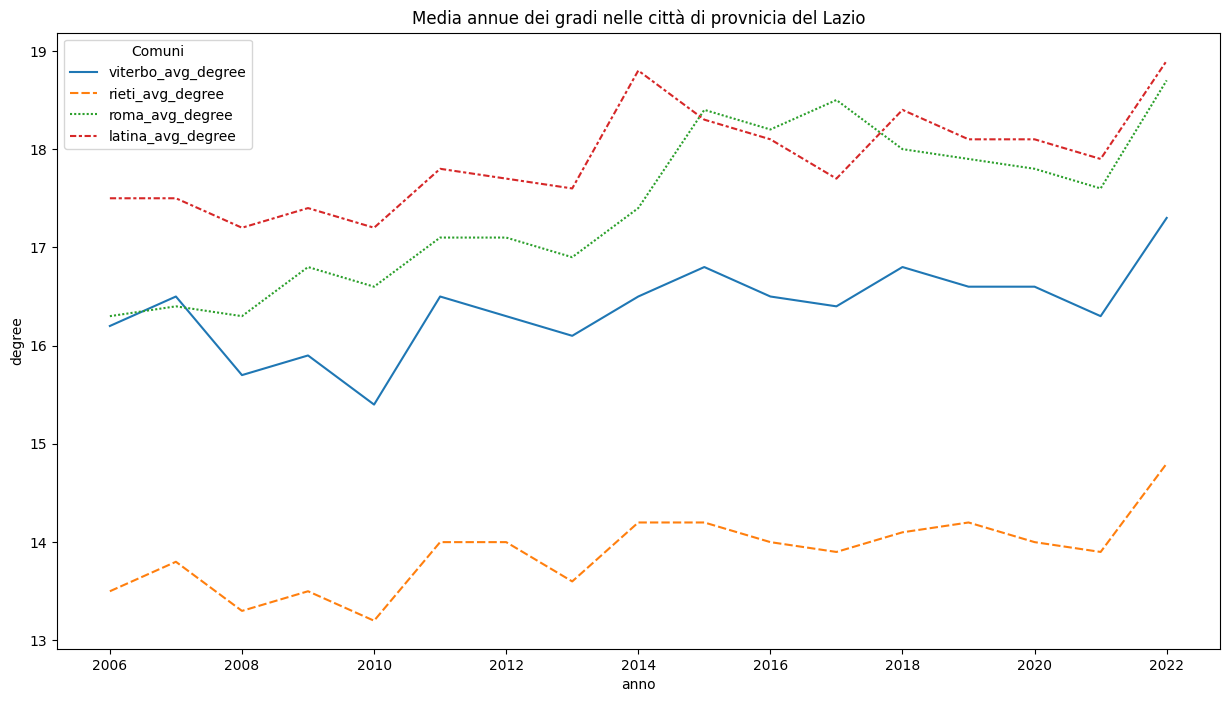

In [115]:
plt.figure(figsize=(15,8))
sns.lineplot(data=tab_degree1)
plt.title("Media annue dei gradi nelle città di provnicia del Lazio")
plt.legend(title='Comuni')
plt.ylabel("degree")

In [116]:
bb = bb.rename(columns={"anni" : "anno","numero incendi" : "n_incendi", "Totale km" : "tot_km" })

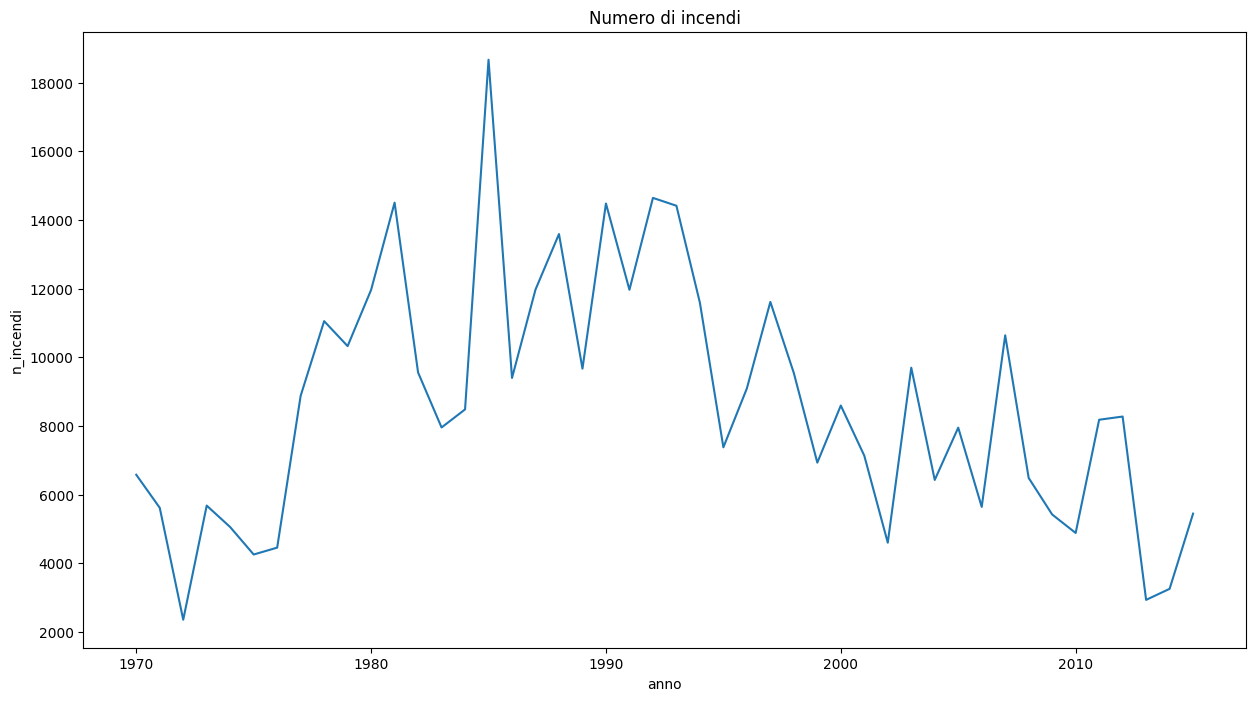

In [117]:
plt.figure(figsize=(15,8))
sns.lineplot(data=bb,y="n_incendi",x="anno")
plt.title("Numero di incendi")
plt.show()

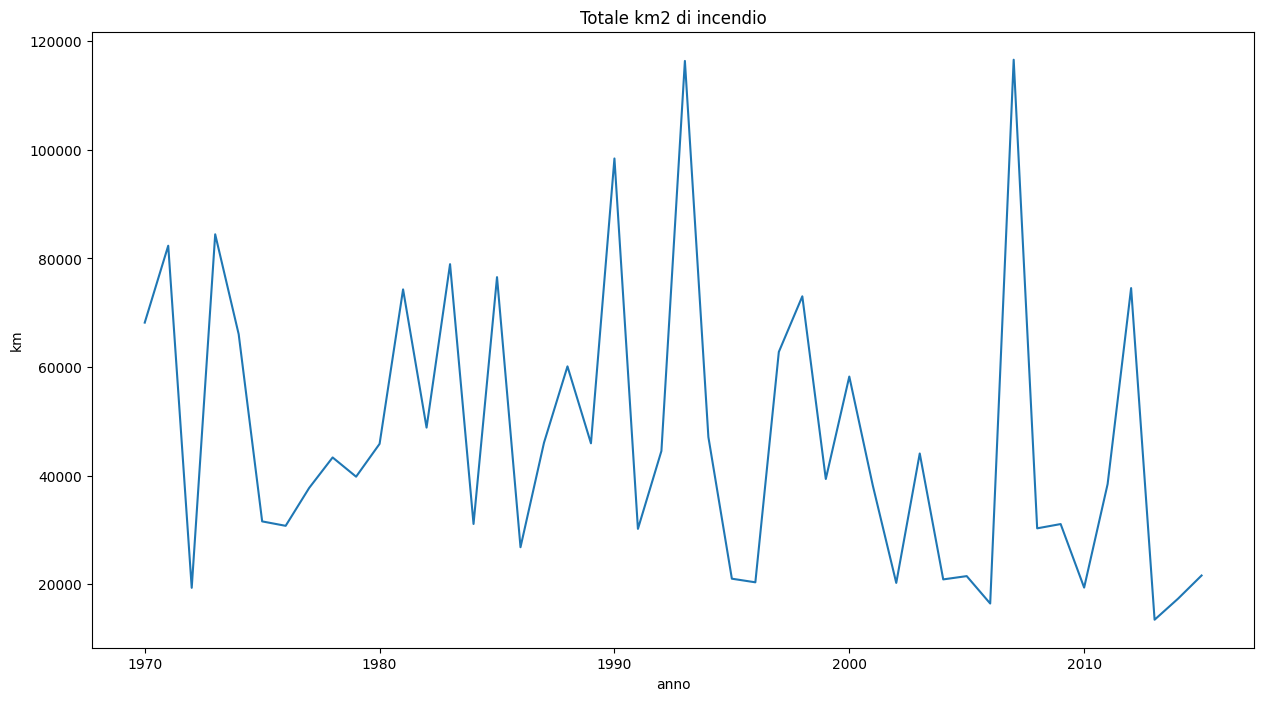

In [118]:
plt.figure(figsize=(15,8))
sns.lineplot(data=bb, x = "anno" , y="tot_km")
plt.title("Totale km2 di incendio")
plt.ylabel("km")
plt.show()

In [119]:
gradi['differenza'] = gradi['2022']-gradi['2006']

In [120]:
gradi_ord = gradi.sort_values(by='differenza', ascending=False)

In [121]:
grordf = gradi_ord.head()
grordf = grordf.drop("differenza",axis=1)

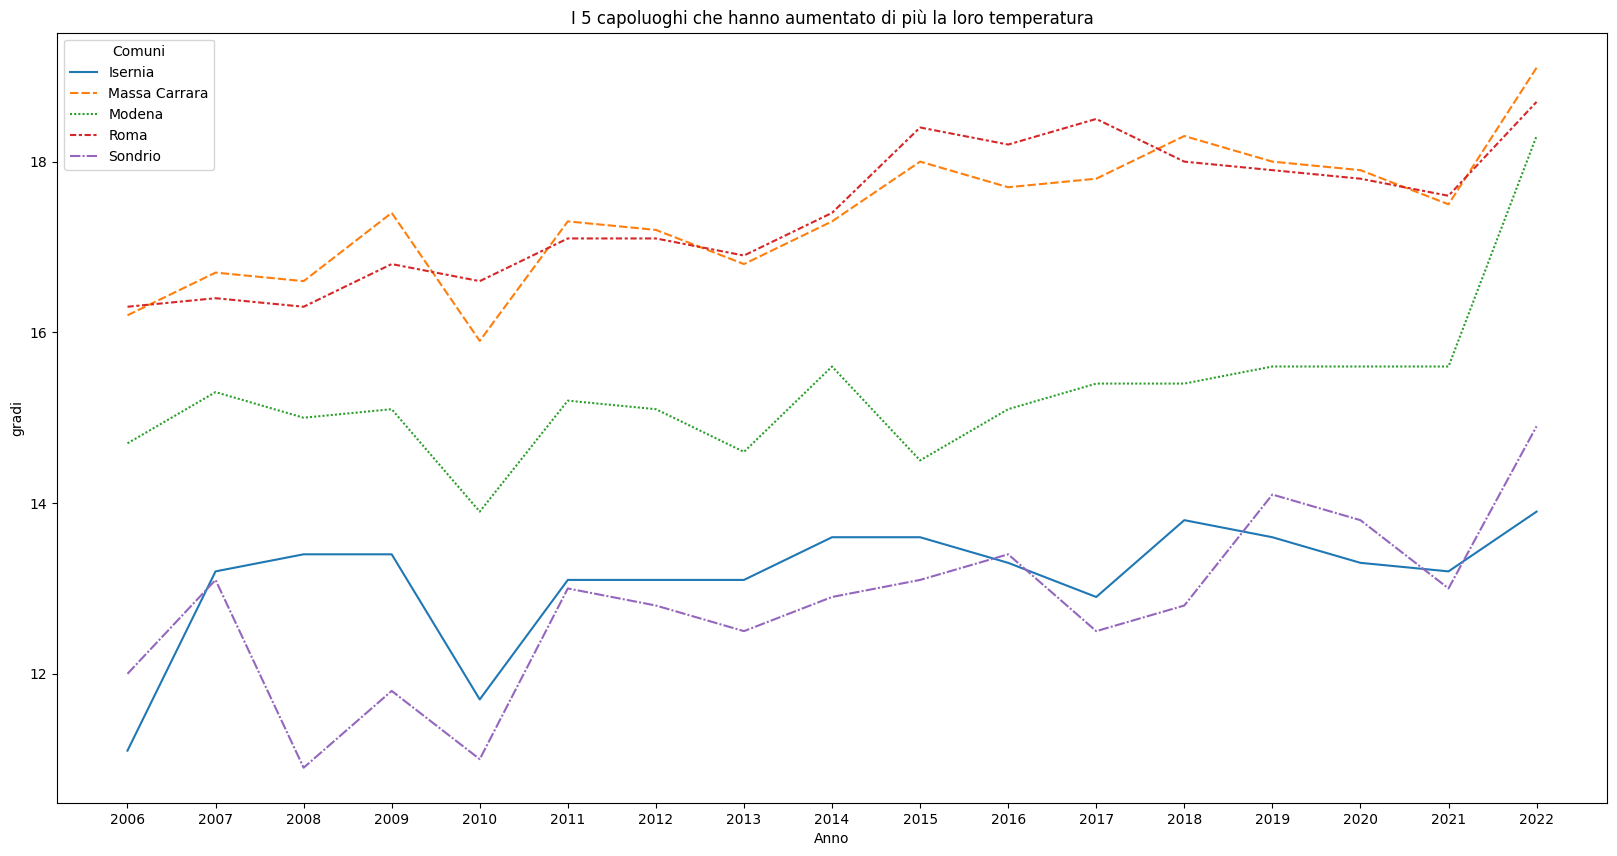

In [122]:
grordf_melted = grordf.melt(id_vars=["Comuni gradi"], var_name="Anno", value_name="Grado")
grordf_pivoted = grordf_melted.pivot(index="Anno", columns="Comuni gradi", values="Grado")
grordf_pivoted = grordf_pivoted.rename(columns={"Comuni gradi Anno":"Anno"})

plt.figure(figsize=(20,10))
sns.lineplot(data=grordf_pivoted)
plt.ylabel("gradi")
plt.title("I 5 capoluoghi che hanno aumentato di più la loro temperatura")
plt.legend(title='Comuni')
plt.show()

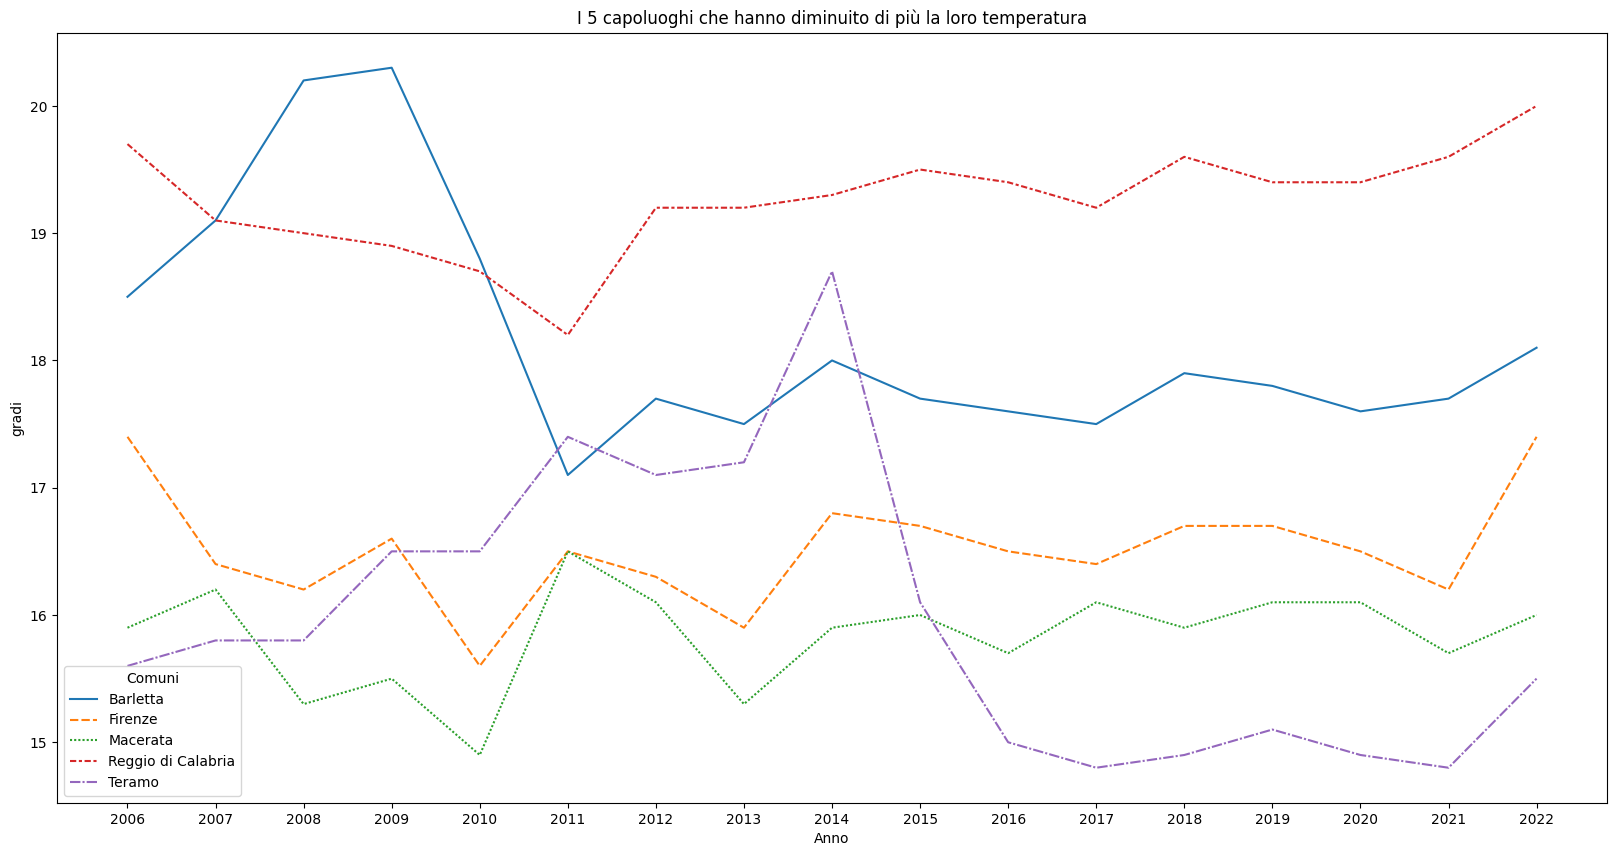

In [123]:
gradi_ord1 = gradi.sort_values(by='differenza', ascending=True)
grordf1 = gradi_ord1.head()
grordf1 = grordf1.drop("differenza",axis=1)
grordf_melted1 = grordf1.melt(id_vars=["Comuni gradi"], var_name="Anno", value_name="Grado")
grordf_pivoted1 = grordf_melted1.pivot(index="Anno", columns="Comuni gradi", values="Grado")

plt.figure(figsize=(20,10))
sns.lineplot(data=grordf_pivoted1)
plt.title("I 5 capoluoghi che hanno diminuito di più la loro temperatura")
plt.ylabel("gradi")
plt.legend(title='Comuni')
plt.show()

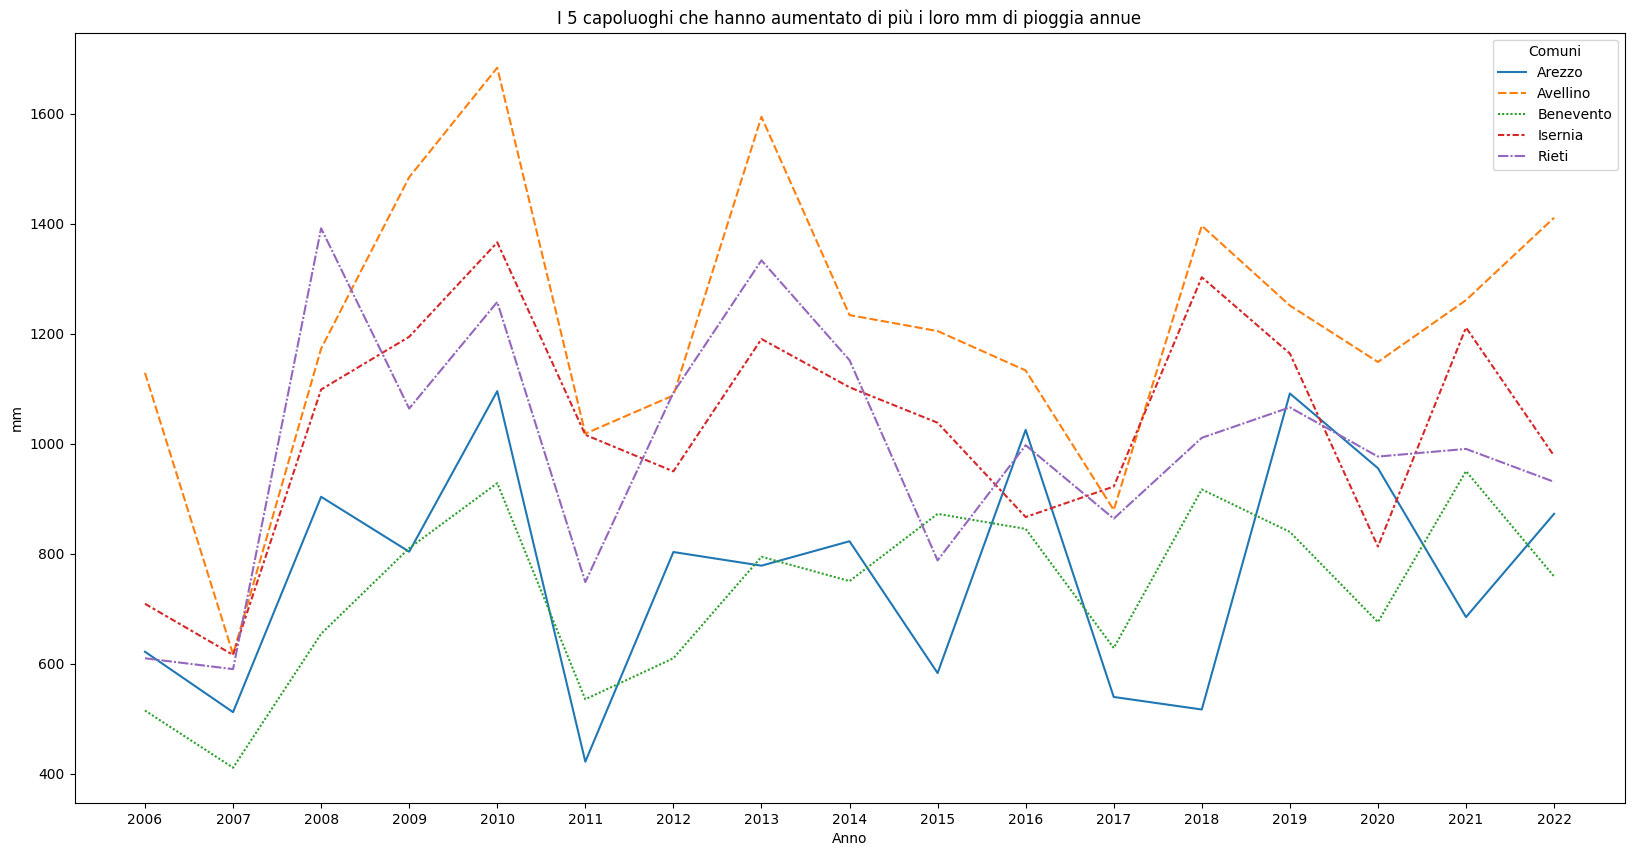

In [124]:
mm['differenze'] = mm['2022']-mm['2006']

mm_sp = mm.sort_values(by='differenze',ascending=False)
mm_sn = mm.sort_values(by='differenze',ascending=True)
mm_sp = mm_sp.head()
mm_sn = mm_sn.head()
mm_sp = mm_sp.drop("differenze",axis=1)
mm_sn = mm_sn.drop("differenze",axis=1)
mm_sp = mm_sp.melt(id_vars=["comuni mm"], var_name="Anno", value_name="mm")
mm_sn = mm_sn.melt(id_vars=["comuni mm"], var_name="Anno", value_name="mm")
mm_sp = mm_sp.pivot(index="Anno", columns="comuni mm", values="mm")
mm_sn = mm_sn.pivot(index="Anno", columns="comuni mm", values="mm")

plt.figure(figsize=(20,10))
sns.lineplot(data=mm_sp)
plt.title("I 5 capoluoghi che hanno aumentato di più i loro mm di pioggia annue")
plt.ylabel("mm")
plt.legend(title='Comuni')
plt.show()

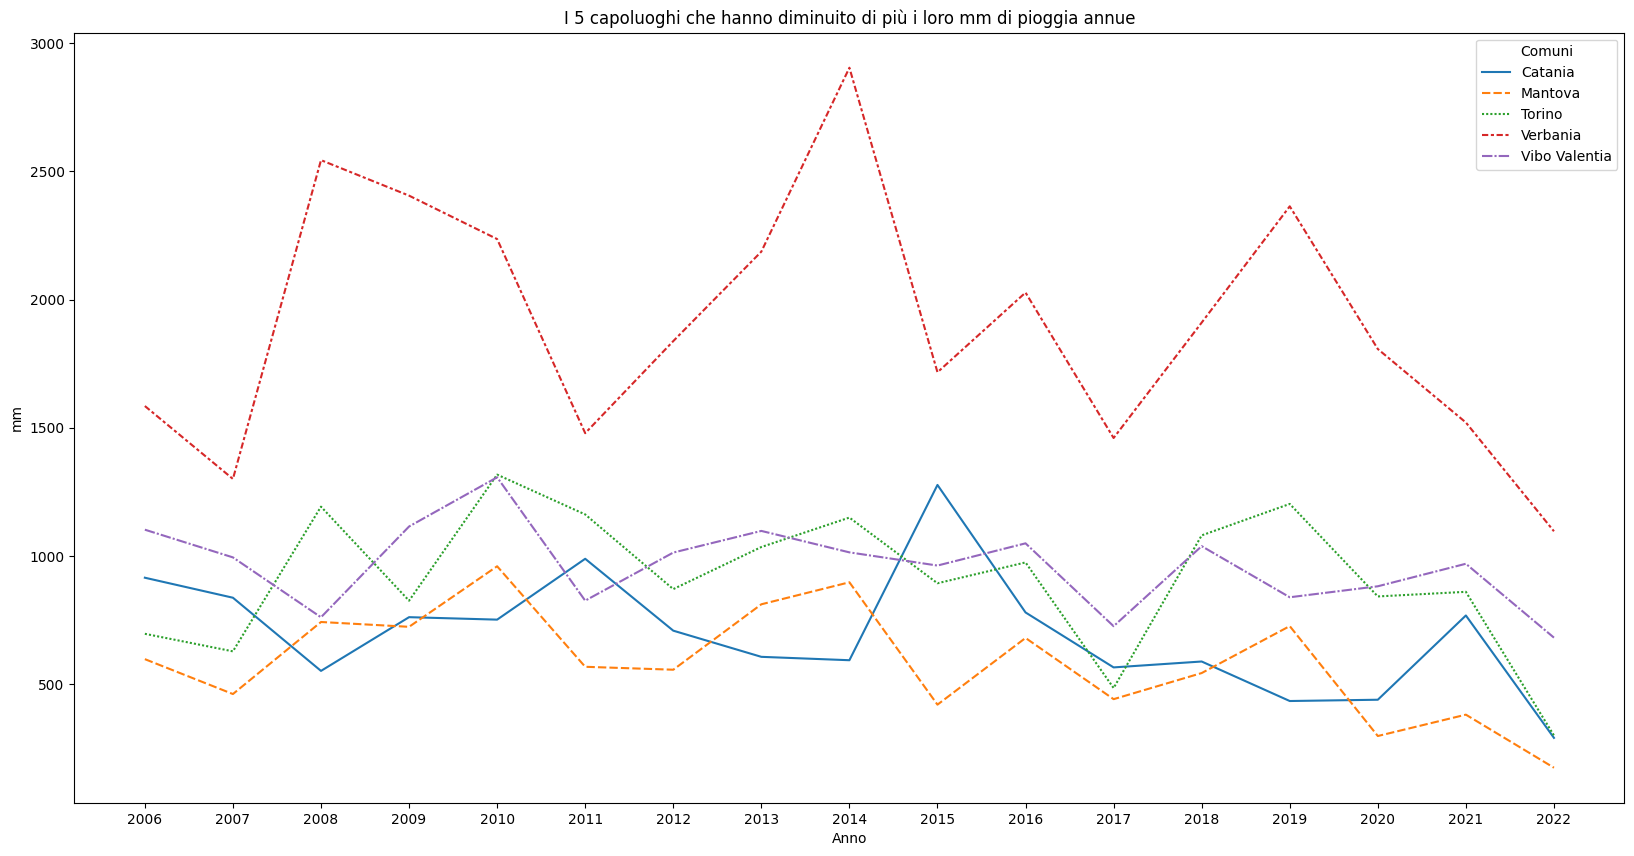

In [125]:
plt.figure(figsize=(20,10))
sns.lineplot(data=mm_sn)
plt.title("I 5 capoluoghi che hanno diminuito di più i loro mm di pioggia annue")
plt.ylabel("mm")
plt.legend(title='Comuni')
plt.show()

In [126]:
gradi = gradi.drop("differenza",axis=1)
gradi_cp = gradi.set_index('Comuni gradi')
gradi_cp = gradi_cp.loc[['L\'Aquila','Potenza','Catanzaro','Napoli','Bologna','Roma','Trieste','Ancona','Milano','Genova','Campobasso','Bari','Torino','Palermo','Firenze','Trento','Perugia','Aosta','Venezia']]
gradi_cp = gradi_cp.rename(index={'L\'Aquila' : 'Abruzzo', 'Potenza' : 'Basilicata' , 'Catanzaro' : 'Calabria' , 'Napoli':'Campania' , 'Bologna':'Emilia-Romagna' , 'Roma':'Lazio' , 'Triste':'Friuli-Venezia Giulia' , 'Ancona':'Marche' , 'Milano':'Lombardia' , 'Genova':'Liguria' , 'Campobasso':'Molise','Bari':'Puglia','Torino':'Piemonte','Palermo':'Sicilia','Firenze':'Torneo','Treno':'Trentino-Alto-Adige','Perugia':'Umbria','Aosta':'Valle d\'Aosta','Venezia':'Veneto'})
gradi_cp = gradi_cp.T

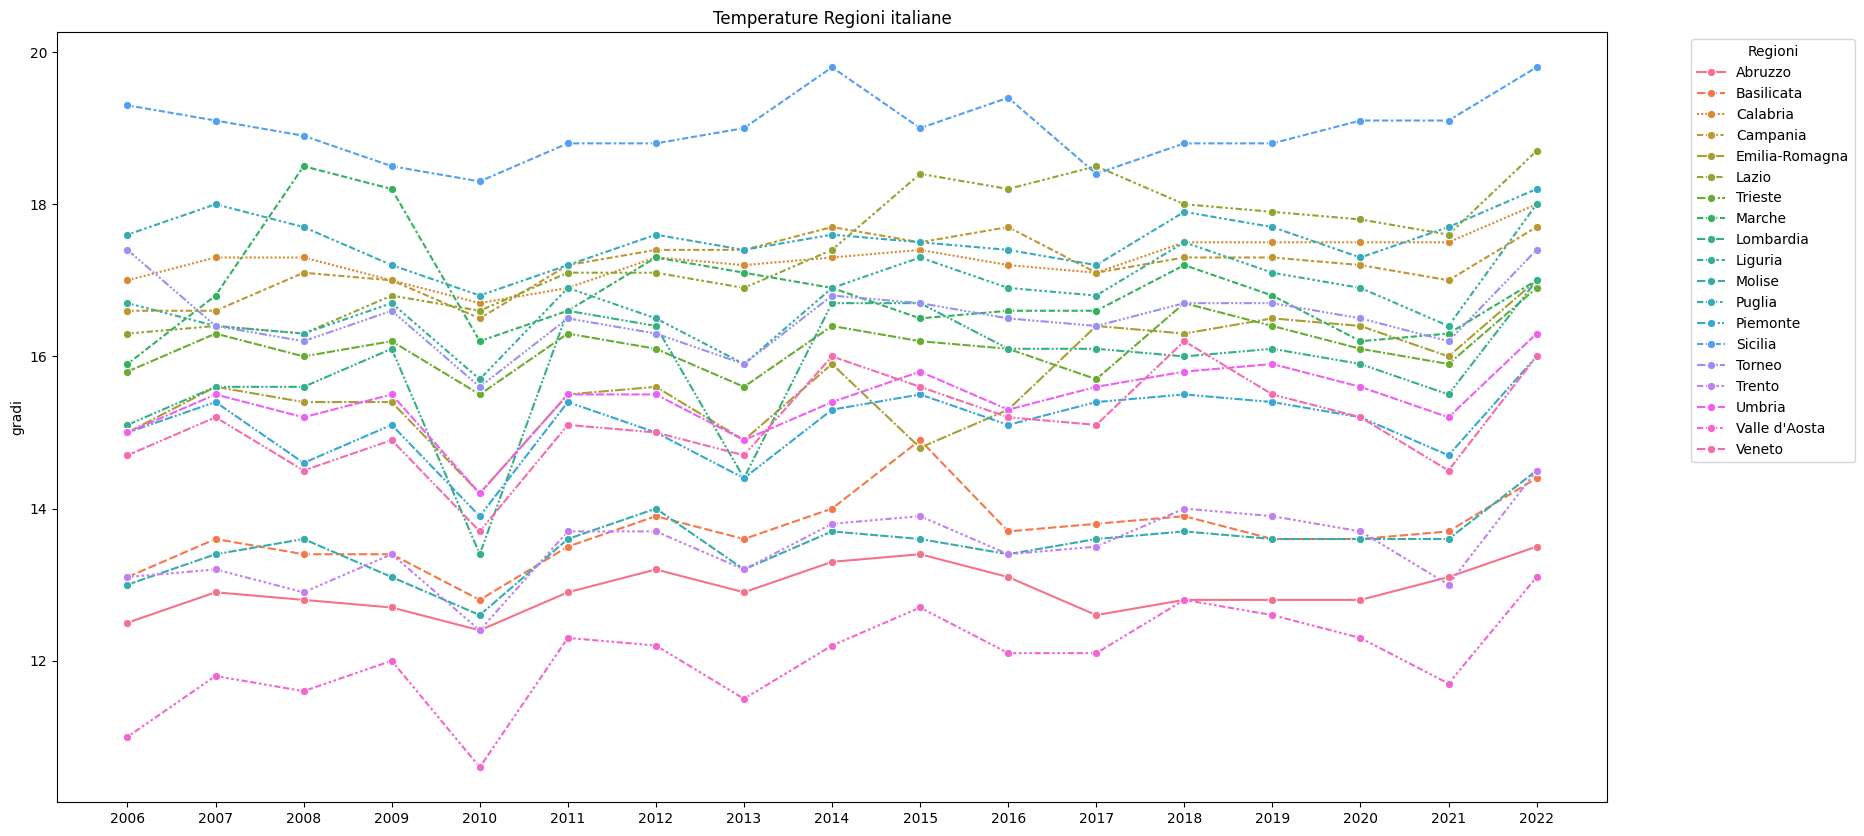

In [127]:
plt.figure(figsize=(20,10))
sns.lineplot(data=gradi_cp, marker='o')
plt.title("Temperature Regioni italiane")
plt.ylabel("gradi")
plt.legend(title='Regioni', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [128]:
mm = mm.drop("differenze",axis=1)
mm_cp = mm.set_index('comuni mm')
mm_cp = mm_cp.loc[['L\'Aquila','Cagliari','Potenza','Catanzaro','Napoli','Bologna','Roma','Trieste','Ancona','Como','Genova','Isernia','Bari','Torino','Palermo','Firenze','Trento','Perugia','Aosta','Venezia']]
mm_cp = mm_cp.rename(index={'L\'Aquila' : 'Abruzzo','Cagliari':'Sardegna', 'Potenza' : 'Basilicata' , 'Catanzaro' : 'Calabria' , 'Napoli':'Campania' , 'Bologna':'Emilia-Romagna' , 'Roma':'Lazio' , 'Triste':'Friuli-Venezia Giulia' , 'Ancona':'Marche' , 'Como':'Lombardia' , 'Genova':'Liguria' , 'Isernia':'Molise','Bari':'Puglia','Torino':'Piemonte','Palermo':'Sicilia','Firenze':'Torneo','Treno':'Trentino-Alto-Adige','Perugia':'Umbria','Aosta':'Valle d\'Aosta','Venezia':'Veneto'})
mm_cp = mm_cp.T

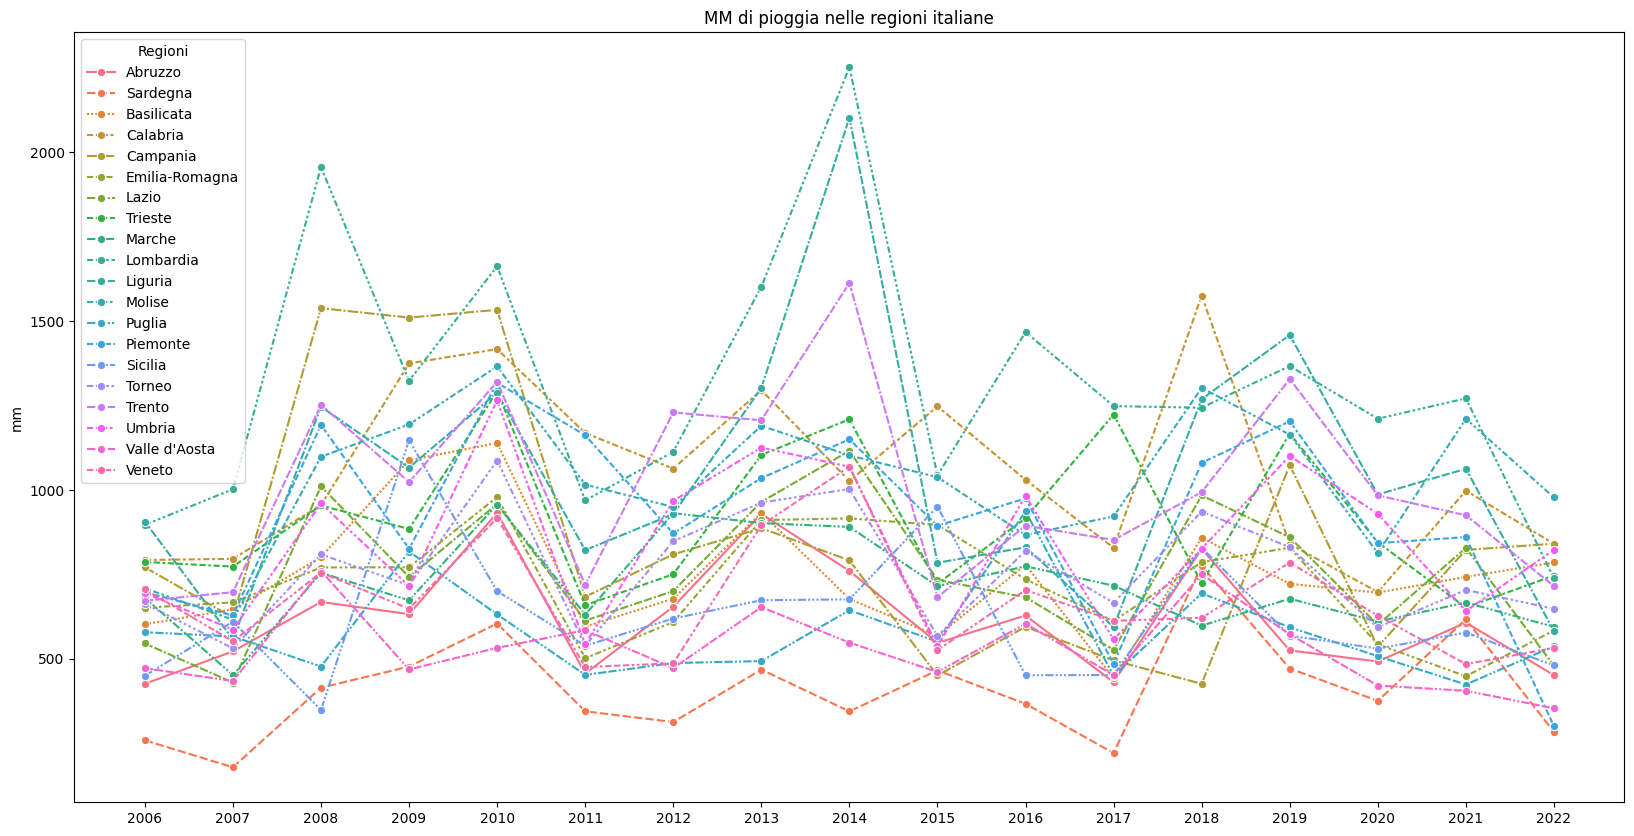

In [129]:
plt.figure(figsize=(20,10))
sns.lineplot(data=mm_cp, marker='o')
plt.title("MM di pioggia nelle regioni italiane")
plt.ylabel("mm")
plt.legend(title='Regioni')
plt.show()
plt.show()